### overview

Neural networks are, in essence, logically sequenced mathematical expressions. They take the data and the initial weights as an input, and the outputs are the predictions (labels for unseen instances informed by past instances). Backpropagation, the optimization of weights through derivatives of the loss function with respect to each weight, relies only on arbitrary mathematical expressions, which are completely independent of neural networks. It is simply a machinery that happens to be highly effective in the training of neural networks.

In [183]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from graphviz import Digraph
import random


In [184]:
def f(x):
    return 3*x**2 - 4*x + 5

f(3.0)

20.0

In [185]:
results = {}
x_s = np.arange(-5, 5, 0.25)
for x in x_s:
    results[x] = f(x)

for (x, y) in results.items():
    print('x: {x}, y: {y}'.format(x=x, y=y))

x: -5.0, y: 100.0
x: -4.75, y: 91.6875
x: -4.5, y: 83.75
x: -4.25, y: 76.1875
x: -4.0, y: 69.0
x: -3.75, y: 62.1875
x: -3.5, y: 55.75
x: -3.25, y: 49.6875
x: -3.0, y: 44.0
x: -2.75, y: 38.6875
x: -2.5, y: 33.75
x: -2.25, y: 29.1875
x: -2.0, y: 25.0
x: -1.75, y: 21.1875
x: -1.5, y: 17.75
x: -1.25, y: 14.6875
x: -1.0, y: 12.0
x: -0.75, y: 9.6875
x: -0.5, y: 7.75
x: -0.25, y: 6.1875
x: 0.0, y: 5.0
x: 0.25, y: 4.1875
x: 0.5, y: 3.75
x: 0.75, y: 3.6875
x: 1.0, y: 4.0
x: 1.25, y: 4.6875
x: 1.5, y: 5.75
x: 1.75, y: 7.1875
x: 2.0, y: 9.0
x: 2.25, y: 11.1875
x: 2.5, y: 13.75
x: 2.75, y: 16.6875
x: 3.0, y: 20.0
x: 3.25, y: 23.6875
x: 3.5, y: 27.75
x: 3.75, y: 32.1875
x: 4.0, y: 37.0
x: 4.25, y: 42.1875
x: 4.5, y: 47.75
x: 4.75, y: 53.6875


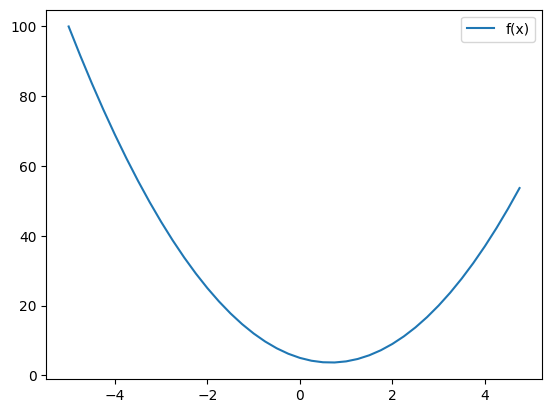

In [186]:
plt.plot(x_s, results.values(), label='f(x)')
plt.legend()

In [187]:
def df(x):
    return 6*x - 4

h = 0.0001
approx = (f(x_s + h) - f(x_s)) / h


results_with_d = {}
for i, x in enumerate(x_s):
    results_with_d[x] = [f(x), df(x), approx[i]]

for (x, y) in results_with_d.items():
    print("x: {x}, [f(x), f'(x), f'(x) approx]: {y}".format(x=x, y=y))

x: -5.0, [f(x), f'(x), f'(x) approx]: [np.float64(100.0), np.float64(-34.0), np.float64(-33.99969999989594)]
x: -4.75, [f(x), f'(x), f'(x) approx]: [np.float64(91.6875), np.float64(-32.5), np.float64(-32.49969999998825)]
x: -4.5, [f(x), f'(x), f'(x) approx]: [np.float64(83.75), np.float64(-31.0), np.float64(-30.999699999938457)]
x: -4.25, [f(x), f'(x), f'(x) approx]: [np.float64(76.1875), np.float64(-29.5), np.float64(-29.49970000003077)]
x: -4.0, [f(x), f'(x), f'(x) approx]: [np.float64(69.0), np.float64(-28.0), np.float64(-27.999699999980976)]
x: -3.75, [f(x), f'(x), f'(x) approx]: [np.float64(62.1875), np.float64(-26.5), np.float64(-26.499700000002235)]
x: -3.5, [f(x), f'(x), f'(x) approx]: [np.float64(55.75), np.float64(-25.0), np.float64(-24.999700000023495)]
x: -3.25, [f(x), f'(x), f'(x) approx]: [np.float64(49.6875), np.float64(-23.5), np.float64(-23.499700000044754)]
x: -3.0, [f(x), f'(x), f'(x) approx]: [np.float64(44.0), np.float64(-22.0), np.float64(-21.999700000066014)]
x: 

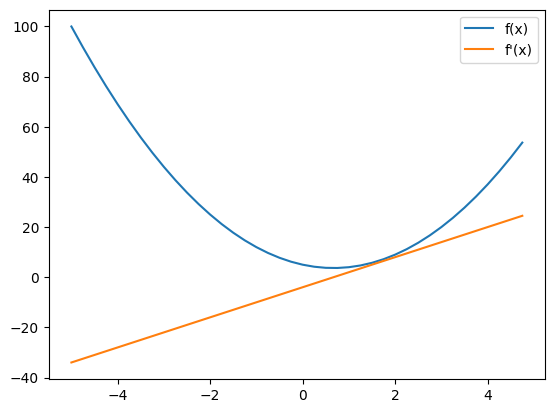

In [188]:
plt.plot(x_s, f(x_s), label='f(x)')
plt.plot(x_s, df(x_s), label="f'(x)")
plt.legend()

In [189]:
## a more complex examples, a function depending on many variables

a = 2.0
b = -3.0
c = 10.0

d = a*b + c

#notice a*b is a negative number (since they are of opposite signs)

def eval_expression(a: float, b: float, c: float):
    return a*b + c

def approx_derivative(func, wrt, h=0.0001, **kwargs):
    inputs_h = kwargs.copy()
    #perturb the spec. variable we are diffing with respect to
    inputs_h[wrt] += h
    base_val = func(**kwargs)
    perturbed_val = func(**inputs_h)
    derivative_val = (perturbed_val - base_val)/h
    print(f'base_val: {base_val}, perturbed_val: {perturbed_val}, derivative_val: {derivative_val}')

points = {'a': 2.0, 'b': -3.0, 'c': 10.0}
derivative_wrt_a = approx_derivative(eval_expression, wrt='a', **points)
derivative_wrt_b = approx_derivative(eval_expression, wrt='b', **points)
derivative_wrt_c = approx_derivative(eval_expression, wrt='c', **points)

base_val: 4.0, perturbed_val: 3.999699999999999, derivative_val: -3.000000000010772
base_val: 4.0, perturbed_val: 4.0002, derivative_val: 2.0000000000042206
base_val: 4.0, perturbed_val: 4.0001, derivative_val: 0.9999999999976694


The following is an implementation of the micrograd's `Value` class (the exact same logic as explained by Karpathy, but extended to some more of the endless mathematical expressions we can cover such as `__pow__`, `__truediv__`, `exp`, `log`, `cos`, `relu`, etc.). Another modification is the `_unbroadcast(grad, shape)` helper function, which aims to 'undo' Numpy's broadcasting when we propagate gradients back into operands that were broadcast up to a larger shape in the forward pass.

```python
a = np.array([1, 2, 3]) # shape (3, )
b = np.array([[10], [20]]) # shape (2,1)
c = a + b
```
When we do something like the above, both `a` and `b` are stretched to shape `(2, 3)` in order for the addition to work elementwise.

In [190]:
a = np.array([1, 2, 3])
b = np.array([[10], [20]])
c = a + b
print(c.shape)
print(c)

(2, 3)
[[11 12 13]
 [21 22 23]]


In backprop we compute `dc/d(a or b)` by taking `dL/dc` and multiplying it by the local derivative, yielding a gradient of shape `(2, 3)`. However, `a` itself has shape `(3,)`, and `b` shape `(2,1)`, so we need to sum the gradient over the dimensions that were expanded (or broadcasted) to get a correctly-shaped gradient for each original operand. so if

$$
c_{ij} = a_j + b_i
$$
then
$$
\frac{\partial L}{\partial a_j} = \sum_{i=0}^{1} \frac{\partial L}{\partial c_{ij}}, \space \frac{\partial L}{\partial b_i} = \sum_{j=0}^{2} \frac{\partial L}{\partial c_{ij}}
$$

so the `_unbroadcast` method works by collapsing any extra dimensions that got prefixed during broadcast, and then collapsing any singleton dimensions that were used to broadcast a length-1 axis. It is a static method since we do not need any data at all from `self`.

In other words, before we could only backpropagate through operations on perfectly-matched shapes, and manually detect which axes were broadcasted and sum them ourselves in every operator's backward pass. As we add more ops and higher-rank tensors, this would become a maintenance nightmare. We can now work with mini-batches of shape `(batch_size, features)`, convolutional patches of shape `(batch, channels, height, width)`, broadcasted biases, normalization layers, etc.

In [191]:
class Value:
    """
    A scalar or tensor value with automatic differentiation.
    Support broadcasting and gradient un-broadcasting.
    """
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = np.array(data, dtype=np.float32) if not isinstance(data, Value) else data.data
        self.grad = np.zeros_like(self.data, dtype=np.float32)
        self._backward = lambda: None #placeholder
        self._prev = set(_children)
        self._op = _op # the operation that produced this node
        self.label = label
        self.shape = self.data.shape

    # util for broadcasting gradients
    @staticmethod
    def _unbroadcast(grad, shape):
        """
        undo numpy broadcasting by summing grad along axes where
        the original shape introduced size-1 dimensions or extra
        leading dimensions
        """
        # sum out broadcasted dimensions
        #remove extra dims
        while grad.ndim > len(shape):
            grad = grad.sum(axis=0)

        #sum along dims where original shape == 1
        for ax, s in enumerate(shape):
            if s == 1:
                grad = grad.sum(axis=ax, keepdims=True)
        return grad

    def __str__(self):
        return f'Value(data={self.data})'

    def __repr__(self):
        return f'Value(data={self.data})'

    # -- Binary operations -----------------------
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other) #to support constants
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += Value._unbroadcast(out.grad, self.shape) # chain rule: dL/dx = dL/dout * dout/dx =  out.grad * 1.0
            other.grad += Value._unbroadcast(out.grad, other.shape) # chain rule: dL/dy = dL/dout * dout/dy = out.grad * 1.0
        out._backward = _backward
        return out

    def __radd__(self, other):
        return self + other

    def __sub__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        return self + (-other)

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += Value._unbroadcast(other.data * out.grad, self.shape)# Chain rule: dL/dx = dL/dout * dout/dx = out.grad * y
            other.grad += Value._unbroadcast(self.data * out.grad, other.shape) #dL/dy = dL/dout * dout/dy = out.grad * x
        out._backward = _backward
        return out

    def __rmul__(self, other):
        return self*other

    def __truediv__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        return self * other**-1

    def __rtruediv__(self, other):
        return Value(other)/self

    def __pow__(self, other):
        if not isinstance(other, Value):
            out = Value(self.data ** other, (self, ), f'**{other}')
            def _backward():
                self.grad += Value._unbroadcast(other * self.data ** (other-1) * out.grad, self.shape)
            out._backward = _backward
            return out

        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data ** other.data, (self, other), f'**{other.data}')

        def _backward():
            # derivative wrt x: y * x^(y-1)
            self.grad += Value._unbroadcast(other.data * (self.data**(other.data-1)) * out.grad, self.shape)
            # derivative wrt y: ln(x) * x^y
            other.grad += Value._unbroadcast(np.log(self.data) * out.data * out.grad, other.shape)
        out._backward = _backward
        return out

    def __neg__(self):
        return self * -1

    # ---- Unary operations -----------------------------
    def exp(self):
        out = Value(np.exp(self.data), (self,), 'exp')
        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward
        return out

    def log(self):
        out = Value(np.log(self.data), (self,), 'log')
        def _backward():
            self.grad += (1 / self.data) * out.grad
        out._backward = _backward
        return out

    def sin(self):
        out = Value(np.sin(self.data), (self,), 'sin')
        def _backward():
            self.grad += np.cos(self.data) * out.grad
        out._backward = _backward
        return out

    def cos(self):
        out = Value(np.cos(self.data), (self,), 'cos')
        def _backward():
            self.grad += -np.sin(self.data) * out.grad
        out._backward = _backward
        return out

    def tanh(self):
        t = np.tanh(self.data)
        out = Value(t, (self,), 'tanh')
        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward
        return out

    def relu(self):
        out_data = np.maximum(0, self.data)
        out = Value(out_data, (self,), 'relu')
        def _backward():
            self.grad += (out_data > 0) * out.grad
        out._backward = _backward
        return out

    def softplus(self):
        # softplus(x) = log(1+exp(x))
        sp = np.log1p(np.exp(self.data))
        out = Value(sp, (self,), 'softplus')
        def _backward():
            self.grad += (1 / (1 + np.exp(-self.data))) * out.grad
        out._backward = _backward
        return out

    # Elementwise max/min
    def maximum(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out_data = np.maximum(self.data, other.data)
        out = Value(out_data, (self, other), 'max')
        def _backward():
            mask_self = (self.data >= other.data)
            mask_other = ~mask_self
            self.grad += mask_self * out.grad
            other.grad += mask_other * out.grad
        out._backward = _backward
        return out

    def minimum(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out_data = np.minimum(self.data, other.data)
        out = Value(out_data, (self, other), 'min')
        def _backward():
            mask_self = (self.data <= other.data)
            mask_other = ~mask_self
            self.grad += mask_self * out.grad
            other.grad += mask_other * out.grad
        out._backward = _backward
        return out

    # --- Graph utils --------------------------

    def _build_topo(self, visited=None, topo=None):
        if visited is None: visited = set()
        if topo is None: topo = []
        if self not in visited:
            visited.add(self)
            for child in self._prev:
                child._build_topo(visited, topo)
            topo.append(self)
        return topo

    def backward(self, clear_graph=False):
        """
        backprop gradients from this node to all dependencies.
        clear_graph clears _prev and _backward of all nodes, just
        to free up memory.
        """
        # build/reuse topological order
        self._topo = self._build_topo()
        # init output grad and zero others
        for node in self._topo:
            node.grad = np.zeros_like(node.data, dtype=float) # keep gradients float
        self.grad = np.ones_like(self.data, dtype=float) # same here
        # backprop
        for node in reversed(self._topo):
            node._backward()

        # optionally clear graph references
        if clear_graph:
            for node in self._topo:
                node._prev = set()
                node._backward = lambda : None
        return self.grad

# -- Gradient-checking utility, following the definition of a derivative ------
def gradient_check(func, inputs, eps=1-6, tol=1e-3):
    """
    to numerically verify gradients via a centered difference
    :param func: function mapping named Value inputs into a single Value output.
    :param inputs: dict of name -> Value instances.
    :param eps: perturbation magnitude (h)
    :param tol: tolerance for comparison
    :return: (analytical_grads, numeric_grads_), with pass/fail per input
    """
    output = func(**inputs)
    output.backward(clear_graph=True)
    analytical = {name: inp.grad.copy() for name, inp in inputs.items()}

    # compute numeric gradients
    numeric = {}
    for name, inp in inputs.items():
        orig = inp.data.copy()
        inp.data = orig + eps
        f_plus = func(**inputs).data
        inp.data = orig-eps
        f_minus = func(**inputs).data
        inp.data = orig
        numeric[name] = (f_plus - f_minus) / (2*eps)

    # compare
    for name in inputs:
        a, n = analytical[name], numeric[name]
        if not np.allclose(a, n, atol=tol):
            print(f'[FAIL] {name}: analytic={a}, numeric={n}')
        else:
            print(f'[PASS] {name}: analytic={a}, numeric={n}')
    return analytical, numeric


points = {'a': Value(2.0), 'b': Value(-3.0), 'c': Value(10.0)}

def track_children(func,wrt,h:Value,**kwargs):
    inputs_h = kwargs.copy()
    #perturb the spec. variable we are diffing with respect to
    inputs_h[wrt] += h
    base_val = func(**kwargs)
    perturbed_val = func(**inputs_h)
    derivative_val = (perturbed_val - base_val)/h
    return base_val, perturbed_val, derivative_val

base_val, perturbed_val_a, derivative_a = track_children(eval_expression, wrt='a', h=Value(0.0001), **points)




Value(data=4.0)


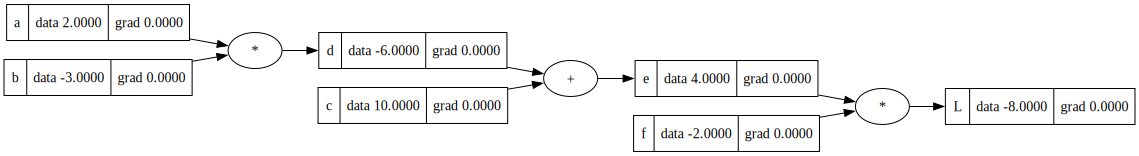

In [192]:
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir})
    nodes, edges = trace(root)
    for node in nodes:
        uid = str(id(node))
        dot.node(name=uid, label="{ %s | data %.4f | grad %.4f }" % (node.label, node.data, node.grad), shape='record')
        if node._op:
            dot.node(name=uid + node._op, label=node._op)
            dot.edge(uid + node._op, uid)

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
d = a*b; d.label = 'd'
e = d+c; e.label = 'e'
f = Value(-2.0, label='f')

L =  e * f; L.label = 'L'

print(e)

draw_dot(L)

In [193]:
L.grad = 1.0

def lol():
    h = Value(0.00001)
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    d = a*b; d.label = 'd'
    e = d+c; e.label = 'e'
    f = Value(-2.0, label='f')

    L1 =  e * f; L1.label = 'L'

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    d = a*(b+h); d.label = 'd'
    e = d+c; e.label = 'e'
    f = Value(-2.0, label='f')

    L2 =  e * f; L.label = 'L'


    print((L2 - L)/h)

lol()




Value(data=-4.00543212890625)


For $f$:

$$
L = e * f \rightarrow \frac{\partial L}{\partial f} = e
$$

Since (e * (f+h))-(e * f)/h = (((e * f) + (e * h))-(e*f))/h = (e * h)/h = e * 1 = e

Symmetrically, for $e$:

$$
L = e * f \rightarrow \frac{\partial L}{\partial e} = f
$$


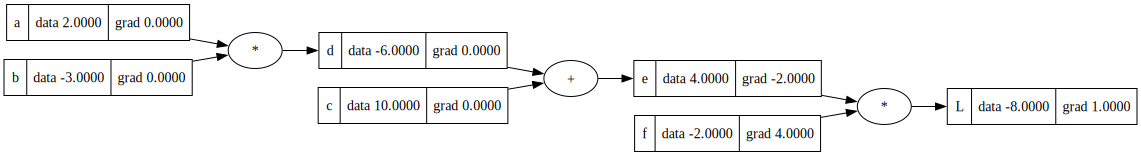

In [194]:
e.grad = f.data
f.grad = e.data

draw_dot(L)


Continuing down the graph, we now need $\frac{\partial L}{\partial c}$, but:

$$
L = e * f, \text{where} \space e = c + d
$$

So we know that $c$ impacts $L$ through $e$. So the impact of $c$ on $L$ is a combination of the sensitivity of $e$ to $c$, and of $L$ to $e$. We use the chain rule:

$$
\frac{\partial L}{\partial c} = \frac{\partial L}{\partial e} \frac{\partial e}{\partial c}
$$

We know $\frac{\partial L}{\partial e}$ and:

$$
\frac{\partial e}{\partial c} = 1
$$

since e = d + c -> ((d + (c + h)) - (d + c))/h = h / h = 1

so

$$
\frac{\partial L}{\partial c} = \frac{\partial L}{\partial e} \frac{\partial e}{\partial c} = f * 1 = -2
$$

$\frac{\partial e}{\partial d}$ is also -2 (by the same logic). All of this can be verified through `lol`.

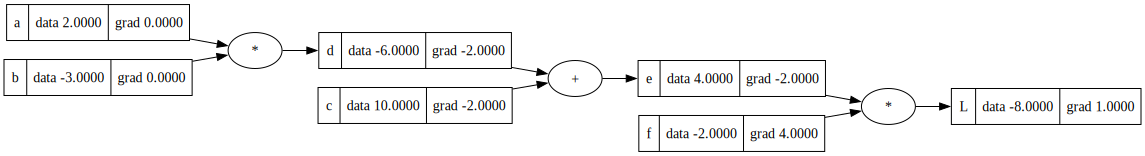

In [195]:
c.grad = -2.0
d.grad = -2.0
draw_dot(L)

Continuing down the graph, we now need $\frac{\partial L}{\partial b}$ and:

$$
L = e * f, \space \text{where} \space e = c + d, \space \text{where} \space d = a * b
$$

So $b$ impacts $L$ through $d$, which impacts $e$, which impacts $L$. So the impact of $b$ on $L$ is a combination of the sensitivity of $d$ to $b$, of $e$ to $d$, and of $L$ to $e$. Again, we use the chain rule:

$$
\frac{\partial L}{\partial b} = \frac{\partial L}{\partial e}\frac{\partial e}{\partial d}\frac{\partial d}{\partial b}
$$

We know $\frac{\partial L}{\partial e}$ = $f$ = -2.0, and $\frac{\partial e}{\partial d}$ = 1, and:

$$
\frac{\partial d}{\partial b} = a = 2.0
$$

since ((a * (b+h)) - (a * b))/h = (((a * b)+(a * h)) - (a * b))/h = (a * h) / h = a

and so:

$$
\frac{\partial L}{\partial b} = \frac{\partial L}{\partial e}\frac{\partial e}{\partial d}\frac{\partial d}{\partial b} = -2 * 1 * 2 = -4
$$



By the same logic $\frac{\partial L}{\partial a}$ = $b$ = 6.0

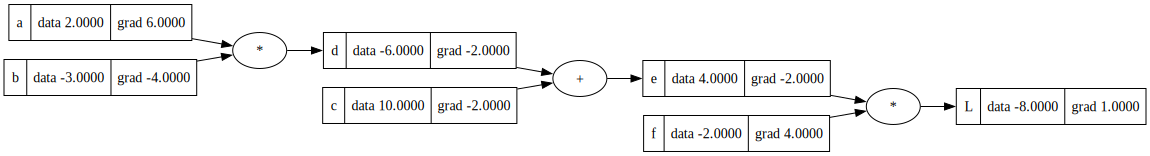

In [196]:
a.grad = 6.0
b.grad = -4.0
draw_dot(L)

With all the gradients of our variables calculated, we can simulate the forward pass and see the single-step change of our loss function $L$ (assuming a maximization scenario) and learning rate of 0.001:

In [197]:
def forward_pass(a, b, c, f, lr=0.01):
    a.data += lr * a.grad
    b.data += lr * b.grad
    c.data += lr * c.grad
    f.data += lr * f.grad

    d = a*b
    e = d+c
    L = f*e
    return L.data


print(f'Current L val: {L.data}')
print(f'L val after one backprop pass: {forward_pass(a=a, b=b, c=c, f=f)}')





Current L val: -8.0
L val after one backprop pass: -7.286495685577393


In [198]:
# another (more useful) example

#sample inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
#sample weights w1, w2 (parameter to optimize through backprop)
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of neuron (parameter to optimze through backprop)
b = Value(6.8813735870, label='b')

x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'



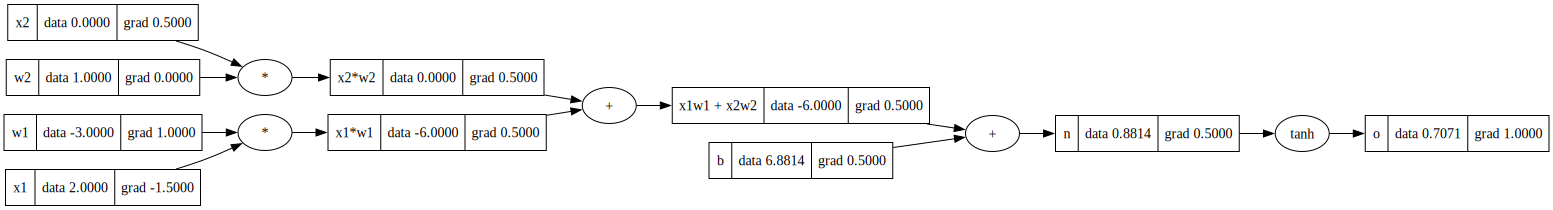

In [199]:
o.backward()
draw_dot(o)


In [200]:
# f(x) = exp(x) * sin(x)
x = Value(0.5, label='x')
f = x.exp() * x.sin(); f.label = 'f'
f.backward()
print(f"Analytic grad at x=0.5: {x.grad}")
# numerical gradient
h = 1e-6
x0 = 0.5
num_grad = (math.exp(x0 + h) * math.sin(x0 + h) - math.exp(x0 - h) * math.sin(x0 - h)) / (2*h)
print(f"Numeric grad at x=0.5:  {num_grad}")

Analytic grad at x=0.5: 2.2373280468838743
Numeric grad at x=0.5:  2.2373281198251327


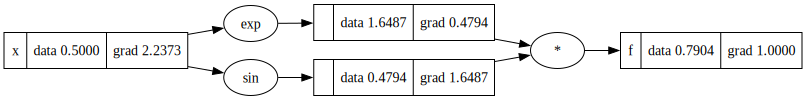

In [201]:
draw_dot(f)

In [202]:
class Neuron:
    def __init__(self, num):
        self.w = [Value(random.uniform(-1, 1)) for _ in range(num)]
        self.b = Value(random.uniform(-1, 1))

    def __call__(self, x):
        act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out

    def parameters(self):
        return self.w + [self.b]

class Layer:
    def __init__(self, num_inputs, num_outputs):
        self.neurons = [Neuron(num_inputs) for _ in range(num_outputs)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs

    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:
    def __init__(self, num_inputs, nouts):
        sz = [num_inputs] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

In [209]:
n = MLP(3, [4, 4, 1])
print(f'Network parameters:\n{n.parameters()}')
print(f'Number of parameters in network: {len(n.parameters())}')

xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0,-1.0],
]

ys = [1.0, -1.0, -1.0, 1.0]

# iteration 0
ypred = [n(x) for x in xs]

print(f'Network predictions:\n{ypred}')

loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
print(f'Network loss:\n{loss}')

loss.backward()
print(n.layers[0].neurons[0].w[0].grad)


Network parameters:
[Value(data=-0.4299287497997284), Value(data=-0.29806622862815857), Value(data=0.8486983776092529), Value(data=0.9813217520713806), Value(data=-0.45337727665901184), Value(data=0.3784353733062744), Value(data=0.27319273352622986), Value(data=0.2184947431087494), Value(data=-0.8286389708518982), Value(data=0.46187159419059753), Value(data=-0.7357093095779419), Value(data=-0.6925277709960938), Value(data=0.6516778469085693), Value(data=-0.9321684837341309), Value(data=-0.2769823372364044), Value(data=0.33107659220695496), Value(data=-0.16652189195156097), Value(data=0.27712762355804443), Value(data=-0.6038559079170227), Value(data=-0.8200612664222717), Value(data=-0.07226970046758652), Value(data=0.25190043449401855), Value(data=-0.8464739322662354), Value(data=0.25342094898223877), Value(data=0.3963984251022339), Value(data=-0.1727404147386551), Value(data=-0.8263814449310303), Value(data=-0.2367643564939499), Value(data=-0.6228280663490295), Value(data=-0.5206155776

In [ ]:
draw_dot(loss)

In [210]:
for p in n.parameters():
    p.data -= 0.01*p.grad

loss.backward()

# after one forward and backprop pass
ypred = [n(x) for x in xs]

print(f'Network predictions:\n{ypred}')

loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
print(f'Network loss:\n{loss}')



Network predictions:
[Value(data=-0.8360514044761658), Value(data=0.5742587447166443), Value(data=-0.9230533838272095), Value(data=-0.13971053063869476)]
Network loss:
Value(data=7.154236793518066)


In [211]:
for p in n.parameters():
    p.data -= 0.01 * p.grad

loss.backward()
# after 2nd backprop and forward pass
ypred = [n(x) for x in xs]

print(f'Network predictions:\n{ypred}')

loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
print(f'Network loss:\n{loss}')

Network predictions:
[Value(data=-0.6174027323722839), Value(data=0.5454301238059998), Value(data=-0.9119763970375061), Value(data=0.15626022219657898)]
Network loss:
Value(data=5.723991394042969)


In [252]:
for p in n.parameters():
    p.data -= 0.01 * p.grad

In [251]:
loss.backward()

array(1.)

In [253]:
# and so on until we have a satisfactory model
ypred = [n(x) for x in xs]

print(f'Network predictions:\n{ypred}')

loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
print(f'Network loss:\n{loss}')

Network predictions:
[Value(data=0.8032376170158386), Value(data=-0.7690767645835876), Value(data=-0.940826416015625), Value(data=0.7091238498687744)]
Network loss:
Value(data=0.18015143275260925)
